In [1]:
import glob

files = glob.glob('./KIMIA_Path_960/*')

In [2]:
import os.path as path
targets = [path.basename(file).split('.')[0][0] for file in files]

In [3]:
lbls = str.upper('abcdefghijklmnopqrst')
lbl_map = {}
for i, l in enumerate(lbls):
    lbl_map[l] = i

targets = [lbl_map[target] for target in targets]

In [17]:


import cv2
import numpy as np

X = np.array([cv2.imread(file) for file in files])
Y = np.array(targets)
X.shape

(960, 168, 308, 3)

In [5]:
from skimage.color import rgb2gray
import numpy
from skimage import data

X_float = X.astype(numpy.float32)/255.

X_g = rgb2gray(X_float)

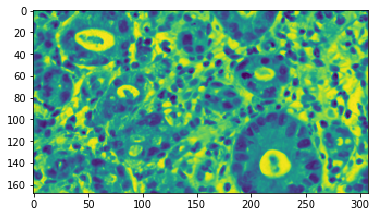

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(X_g[50])

In [7]:
X_fg = np.mean(X_float, axis=3)
len(X_fg)

960

In [8]:
X_fg.shape

(960, 168, 308)

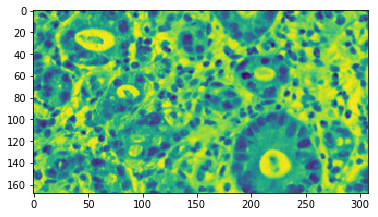

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.imshow(X_fg[50])

In [10]:
X = X_fg

In [11]:
from mahotas.features import lbp

F_tr = []
for x in range(0,960): 
    img = X[x,:]

    LBP = lbp(img, 4, 16, ignore_zeros=False)
    
    F_tr.append(LBP)

print((np.shape(F_tr)))

(960, 4116)


In [24]:
F_tr = np.array(F_tr)

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf2 = svm.SVC(gamma=0.0000015,kernel = 'rbf', tol=0.00001, C=2.5)

y = Y
Str = float()
Ste = float()

kf = KFold(n_splits=3, shuffle=True, random_state=1000)
kf.get_n_splits(F_tr)

print(kf) 
print(kf.split(F_tr))

for train_index, test_index in kf.split(F_tr):
    X_train, X_test = F_tr[train_index], F_tr[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf2.fit(X_train, y_train)
    
    St1 = clf2.score(X_train, y_train)
    St2 = clf2.score(X_test, y_test)
    
    print(St1, St2)
    
    Str = Str +St1
    Ste = Ste + St2

print(Str/3)
print(Ste/3)

KFold(n_splits=3, random_state=1000, shuffle=True)
<generator object _BaseKFold.split at 0x0000019C9E0CB780>
0.996875 0.909375
0.99375 0.890625
0.996875 0.90625
0.995833333333
0.902083333333


In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(min_samples_split = 5, random_state=0, min_samples_leaf = 20)

y = Y
Str = float()
Ste = float()

kf = KFold(n_splits=3, shuffle=True, random_state=1000)
kf.get_n_splits(F_tr)

print(kf) 
print(kf.split(F_tr))

for train_index, test_index in kf.split(F_tr):
    X_train, X_test = F_tr[train_index], F_tr[test_index]
    y_train, y_test = y[train_index], y[test_index]
    cdt.fit(X_train, y_train)
    
    St1 = cdt.score(X_train, y_train)
    St2 = cdt.score(X_test, y_test)
    
    print(St1, St2)
    
    Str = Str +St1
    Ste = Ste + St2

print(Str/3)
print(Ste/3)

KFold(n_splits=3, random_state=1000, shuffle=True)
<generator object _BaseKFold.split at 0x0000019C9E0CB7D8>
0.7828125 0.628125
0.7953125 0.703125
0.771875 0.625
0.783333333333
0.652083333333


In [66]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1200,1200,1200,), learning_rate_init=0.0005, max_iter=500,random_state=500)

y = Y
Str = float()
Ste = float()

kf = KFold(n_splits=3, shuffle=True, random_state=1000)
kf.get_n_splits(F_tr)

print(kf) 
print(kf.split(F_tr))

for train_index, test_index in kf.split(F_tr):
    X_train, X_test = F_tr[train_index], F_tr[test_index]
    y_train, y_test = y[train_index], y[test_index]
    mlp.fit(X_train, y_train)
    
    St1 = mlp.score(X_train, y_train)
    St2 = mlp.score(X_test, y_test)
    
    print(St1, St2)
    
    Str = Str +St1
    Ste = Ste + St2

print(Str/3)
print(Ste/3)

KFold(n_splits=3, random_state=1000, shuffle=True)
<generator object _BaseKFold.split at 0x0000019C9E0F3E60>
0.9875 0.875
0.9796875 0.8875
0.9734375 0.884375
0.980208333333
0.882291666667


In [16]:
y = np.array(Y)

In [21]:
X = np.array(F_tr)

In [33]:
np.shape(X)

(960, 4116)

Automatically created module for IPython interactive environment


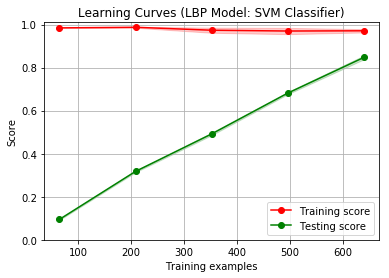

In [22]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")

    plt.legend(loc="best")
    SS = test_scores
    KK = train_scores
    return plt, SS, KK


title = "Learning Curves (LBP Model: SVM Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

estimator = SVC(gamma=0.0000015,kernel = 'rbf', tol=0.00001)
plot_learning_curve(estimator, title, X, y, ylim=(0.0, 1.01), cv=3, n_jobs=4)


plt.show()

Automatically created module for IPython interactive environment


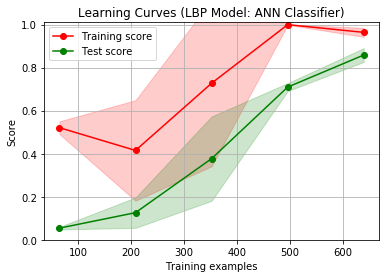

In [23]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.neural_network import MLPClassifier



def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    SS_NN = test_scores
    KK_NN = train_scores
    return plt, SS_NN, KK_NN

title = "Learning Curves (LBP Model: ANN Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

estimator = MLPClassifier(hidden_layer_sizes=(1500,1500,1500,))
plot_learning_curve(estimator, title, X, y, ylim=(0.0,1.01), cv=3, n_jobs=10)


plt.show()